## Lending Club Case Study ##

### Business Objective ###

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

The **Objective** of this study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Approach ###

We will follow a four Step Approach for this Analysis 

1. Data Exploration 
2. Data Cleansing
3. Data Analysis
   - Univariate Analysis
   - Bivariate Analysis
4. Analysis Recommendations

## 1. Data Exploration ##

1. We will first load the Data into Data Frames

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

2. And have a high level Over View of the Data

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan_df.shape

(39717, 111)

In [4]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

**We will analyse only closed loans and drop all rows where the loan status is 'Current'.**

In [5]:
# Drop loans which are active i.e there loan_status is Current 
loan_df = loan_df[loan_df.loan_status != 'Current']

In [6]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,0.0,38577.0,0.0,0.0,0.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38521.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37880.000000,38538.0,0.0,0.0,0.0,0.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043479,0.0,NaN,NaN,NaN,NaN
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204583,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.564230

In [7]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 2. Data Cleansing ##

In [8]:
100*round(loan_df.isnull().sum()/len(loan_df.index),2)

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               32.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


There are considerable number of columns which have No Values at all. We will drop them from the analysis

In [9]:
loan_df.dropna(axis=1, inplace=True, how='all')

In [10]:
loan_df.shape

(38577, 56)

We are now left with only **56**columns from the original 111. Lets analyse this further

In [11]:
# Missing percentage
missing_percent = 100*round(loan_df.isnull().sum()/len(loan_df.index),2)

In [12]:
missing_percent[missing_percent !=0]

emp_title                  6.0
emp_length                 3.0
desc                      32.0
mths_since_last_delinq    65.0
mths_since_last_record    93.0
pub_rec_bankruptcies       2.0
dtype: float64

We can also drop **mths_since_last_record and mths_since_last_delinq**  as they have above 90% empty records

In [13]:
loan_df.drop(['mths_since_last_record', 'mths_since_last_delinq'], axis=1, inplace=True)

In [14]:
missing_percent = 100*round(loan_df.isnull().sum()/len(loan_df.index),2)

In [15]:
missing_percent[missing_percent !=0]

emp_title                6.0
emp_length               3.0
desc                    32.0
pub_rec_bankruptcies     2.0
dtype: float64

We can also drop 

**1. Some other columns with ignorable info like desc**

**2. Remove rows where emp_title, pub_rec_bankruptcies,  emp_length have null values as the percentage of it is very low**

In [16]:
loan_df = loan_df.drop(['desc','url'],axis=1)

In [17]:
loan_df.dropna(inplace=True, how='any')

In [18]:
missing_percent = 100*round(loan_df.isnull().sum()/len(loan_df.index),2)

In [19]:
missing_percent[missing_percent !=0]

Series([], dtype: float64)

 **Now we don't have any missing values**

In [20]:
loan_df.shape

(35365, 52)

We have now reduced to around **52** Columns. Lets understand more about the data

In [21]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,f,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,Jun-13,1655.54,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
11,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.0,Source Verified,Dec-11,Fully Paid,n,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,f,0.0,0.0,13947.989160,13947.99,12000.00,1947.99,0.00,0.00,0.00,Sep-13,6315.30,Aug-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,f,0.0,0.0,2270.700000,2270.70,1256.14,570.26,0.00,444.30,4.16,Jul-12,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
13,1069866,1304956,3000,3000,3000.0,36 months,9.91%,96.68,B,B1,Target,3 years,RENT,15000.0,Source Verified,Dec-11,Fully Paid,n,credit_card,citicard fund,606xx,IL,12.56,0,Jul-03,2,11,0,7323,43.10%,11,f,0.0,0.0,3480.269999,3480.27,3000.00,480.27,0.00,0.00,0.00,Jan-15,102.43,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Lets now look at fields which have high/low variability. In such cases we may not be able to derive any meaningful insights from the data.

In [22]:
loan_df.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       48
issue_d                          51
total_acc                        79
last_credit_pull_d          

In [23]:
loan_df.pymnt_plan.values

array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype=object)

In [24]:
loan_df.zip_code.values

array(['309xx', '917xx', '852xx', ..., '201xx', '226xx', '207xx'],
      dtype=object)

In [25]:
loan_df.acc_now_delinq.value_counts()

0    35365
Name: acc_now_delinq, dtype: int64

In [26]:
loan_df.initial_list_status.value_counts()

f    35365
Name: initial_list_status, dtype: int64

In [27]:
loan_df.collections_12_mths_ex_med.value_counts()

0.0    35365
Name: collections_12_mths_ex_med, dtype: int64

In [28]:
loan_df.chargeoff_within_12_mths.value_counts(dropna=False)

0.0    35365
Name: chargeoff_within_12_mths, dtype: int64

In [29]:
loan_df.tax_liens.value_counts(dropna=False)

0.0    35365
Name: tax_liens, dtype: int64

In [30]:
loan_df.out_prncp.value_counts(dropna=False)

0.0    35365
Name: out_prncp, dtype: int64

In [31]:
loan_df.out_prncp_inv.value_counts(dropna=False)

0.0    35365
Name: out_prncp_inv, dtype: int64

Based on Data Dictionary we did some Data Analysis of the above columns reveals below insights:

| Field Name      | Description | 
| :---        |    :----:   |          
| id          |         ID Field may not useful for the analysis   | 
| member_id   |  ID Field may not be useful for Analysis |
|funded_amnt  | Value is very close to loan amount. Loan Amt can be used for analysis | 
|funded_amt_inv | Value is very close to loan amount. Loan Amt can be used for analysis |
| pymnt_plan | Payment Plan has only one value 'n' and so can be dropped |
| zip_code   | Zip Code has only First 3 Digits and may not be usefule of further analysis |
|initial_list_status | Has only one Value 'F' which is not useful for analysis |
|policy_code | This is the type of policy which is either publicly available or not, not useful for analysis |
|application_type | Whether its individual or joint, has only one value so no insights can be derived |
|acc_now_delinq | Has a constant value of 0, so no meaningful insights can be derived |
|delinq_amnt | Past due amount which has only one value, so no meaninful insights can be derived |
|chargeoff_within_12_mths | Has a constant value of 0, so no meaningful insights can be derived|
|collections_12_mths_ex_med | Has a constant value of 0, so no meaningful insights can be derived |
|tax_liens | Has a constant value of 0, so no meaningful insights can be derived |
|out_prncp | Has a constant value of 0, so no meaningful insights can be derived |
|out_prncp_inv | Has a constant value of 0, so no meaningful insights can be derived |
|title | free text field. Purpose column already does the categorization So we can drop the title column.|

Based on the above reasons the we are planning to drop all the above columns

In [32]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','title','out_prncp_inv','out_prncp']
loan_df= loan_df.drop(columns_tobe_dropped,axis=1) 

In [33]:
loan_df.shape

(35365, 35)

## Standardize data and fix missing values

1. Strip whitespaces from term and remove 'months'
2. Remove % from interest rate , revol_util column and convert to float
3. Convert the emp_title to lower case and also strip off any non alphabet characters.


In [34]:
loan_df.int_rate = loan_df.int_rate.apply(lambda x : float(x.replace('%','')))

In [35]:
loan_df.revol_util = loan_df.revol_util.apply(lambda x : float(x.replace('%','')))

In [36]:
loan_df.int_rate.describe()

count    35365.000000
mean        11.983494
std          3.702615
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [37]:
loan_df.term = loan_df.term.apply(lambda x : x.strip().replace('months',''))
loan_df.term.value_counts()

36     26375
60      8990
Name: term, dtype: int64

In [38]:
loan_df.emp_title = loan_df.emp_title.str.lower().str.replace('[^a-zA-Z]', '')


In [39]:
loan_df.emp_title.value_counts(dropna=False)

usarmy                                                                  256
bankofamerica                                                           133
walmart                                                                 110
att                                                                      93
jpmorganchase                                                            91
selfemployed                                                             80
uspostalservice                                                          75
usairforce                                                               71
wellsfargo                                                               71
ibm                                                                      68
kaiserpermanente                                                         67
usps                                                                     65
verizonwireless                                                          63
ups         

In [40]:
loan_df.home_ownership.value_counts(dropna=False)

RENT        17065
MORTGAGE    15701
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

4. Change NONE value to mode value of the column 'home_ownership' as the only valid values are RENT, OWN, MORTGAGE, OTHER

In [41]:
loan_df.home_ownership.mode()[0]

'RENT'

In [42]:
loan_df.loc[loan_df.home_ownership == 'NONE',['home_ownership']] = 'RENT'

In [43]:
loan_df.home_ownership.value_counts(dropna=False)

RENT        17065
MORTGAGE    15701
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

In [44]:
#Round of to two decimal places
loan_df.total_pymnt = loan_df.total_pymnt.round(2)
loan_df.total_pymnt_inv = loan_df.total_pymnt_inv.round(2)
loan_df.total_rec_int = loan_df.total_rec_int.round(2)
loan_df.recoveries = loan_df.total_rec_int.round(2)
loan_df.dti = loan_df.dti.round(2)

In [45]:
loan_df.shape

(35365, 35)

We are now left with **35** columns from the initial set of **111**. This is a good point to start the analysis

## 3. Data Preparation  ##

- Let us first determine our **Target Variable**. 

This will also help us purge out any unwanted Rows. 
Based on the Data Dictionary the target Variable we have chosen is **Loan Status**

Lets convert the Target Variable to a Number which will enable us to create **Categorical** Charts

In [46]:
# converting type of columns to 'category'

loan_df['loan_status'] = loan_df['loan_status'].astype('category')
#fully paid = 0 , charged_off = 1
loan_df['loan_status_cat']= loan_df.loan_status.apply(lambda x : 1 if "Fully Paid" else 0)


In [47]:
loan_df.loan_status.value_counts(normalize=True)

Fully Paid     0.860257
Charged Off    0.139743
Name: loan_status, dtype: float64

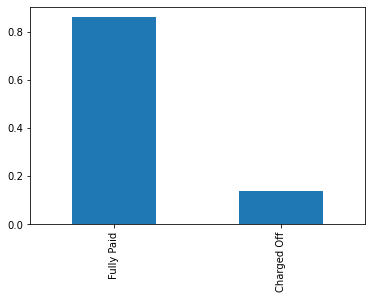

In [48]:
loan_df.loan_status.value_counts(normalize=True).plot.bar()
plt.show()

**Observation**  : 
We now have a cleaner and shorter data set with which we can do our analysis
We also defined our  **Target Variable**  ie **Loan Status**, against which we will do our Analysis
Let us create a temporary checkpoint to store our results

In [49]:
loan_df.sort_index(axis = 1, inplace=True)
loan_df.reset_index(inplace=True,drop=True)

In [50]:
loan_df.to_csv("cleaned.csv", index=False)

## 4. Data Analysis ##

#### Purpose #### 

Here we will look at the data as a whole and try to determine which variables need to be analysed further, using plots


In [51]:
loan_analysis_df = pd.read_csv('cleaned.csv')

In [52]:
# Importing standard libraries 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Reducing max row and columns to normal values
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 50)

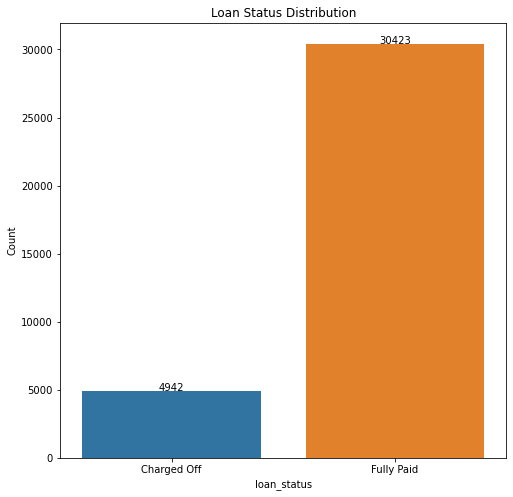

In [53]:
fig, ax1 = plt.subplots(figsize=(8,8))
graph = sns.countplot(ax=ax1,x='loan_status', data=loan_analysis_df)
graph.set_xticklabels(graph.get_xticklabels())#,rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.ylabel("Count")
plt.title('Loan Status Distribution')
plt.show()

In [54]:
def showbarlabel(graph, rotate=0):
  graph.set_xticklabels(graph.get_xticklabels(),rotation=rotate)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [55]:
def plot_bar(by,rotate=0):
    graph = loan_analysis_df[by].value_counts().plot(kind='bar')
    showbarlabel(graph,rotate)
    

In [56]:
#Utility Function 

#Plot dual bar
#This function takes a dataframe and either plots two categorical bars side by side or plots them in the same using hue
#If hue is provided then the plot is done in the same function
#If hue is not provided then the loan_status variable is used to split the same into two side by side bars and plotting is done
def plot_dualbar_or_huebar(df, categorize_by, hue=None, sortbyindex=False, title=None):
    plt.style.use('fivethirtyeight')
    plt.title=title
    if hue:
        plt.figure(figsize=[15,10])
        sns.barplot(data = loan_analysis_df, y=categorize_by, x="loan_status_cat", hue="loan_status" ,estimator=np.sum, orient="h")
        plt.show()
    else :
        plt.figure(figsize=[15,10])
        #Plot for the universe
        
        plt.subplot(1, 2, 1)
        values = loan_analysis_df[categorize_by].value_counts(normalize=True)*100
        if sortbyindex:
            values = values.sort_index()
        ax = values.plot.bar()
        ax.set_ylabel('% in Loans Data', fontsize=16)
        ax.set_xlabel(categorize_by, fontsize=12)
                
        
        #Plot for the charged off loans
        plt.subplot(1, 2, 2)
        #loan_analysis_co_df = (loan_analysis_df.loc[loan_analysis_df['loan_status']=='Charged Off'])
        values_co = (cf[categorize_by].value_counts(normalize=True)*100)
        if sortbyindex:
            values_co = values_co.sort_index()
        ax = values_co.plot.bar()
        ax.set_ylabel('% in Charged Off Loans Data', fontsize=16)
        ax.set_xlabel(categorize_by, fontsize=12)
        plt.show()
        
        
   
       

In [57]:
# Utility Function 

#Plot Distribution against a Categorical Variable (in this case - Loans which are charged off)
#Can be used for Univariate Analysis of Numeric Feature with  Categorical Variable
def plotDistribution_against_Category(dataframe, col, category='loan_status'):
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.distplot(dataframe[col])
    plt.subplot(1,2,2)
    var_distr_by_loan_type = loan_analysis_df.groupby([category])
    sns.boxplot(x=col, y=category, data= dataframe)


Lets determine the categorical and the numeric fields first to get a sense of the data

In [58]:
quant_variables = loan_analysis_df.dtypes[loan_analysis_df.dtypes != "object"].index
categorical_variables = loan_analysis_df.dtypes[loan_analysis_df.dtypes == "object"].index

print("Quantitative Variables: ", len(quant_variables))
print("Categorical Variables: ", len(categorical_variables))

Quantitative Variables:  23
Categorical Variables:  13


In [59]:
quant_variables.sort_values()

Index(['annual_inc', 'collection_recovery_fee', 'delinq_2yrs', 'dti',
       'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt',
       'loan_amnt', 'loan_status_cat', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'recoveries', 'revol_bal', 'revol_util', 'term',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp'],
      dtype='object')

**Plotting Distribution of Categorical Variables**

In [60]:
categorical_variables

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d',
       'loan_status', 'purpose', 'sub_grade', 'verification_status'],
      dtype='object')

In [61]:
loan_analysis_df.earliest_cr_line.value_counts()

Oct-99    342
Nov-98    341
Dec-98    319
Oct-00    315
Nov-99    294
         ... 
Oct-68      1
May-67      1
Nov-08      1
Jun-68      1
May-65      1
Name: earliest_cr_line, Length: 509, dtype: int64

In [62]:
#loan_analysis_df.emp_title.value_counts().head(35).plot.bar()
#plt.title("Borrower Title Distribution Sampling")
#plt.style.use('fivethirtyeight')

In [63]:
#loan_analysis_df.issue_d.value_counts(normalize=True).head(30).plot.bar()
#plt.style.use('fivethirtyeight')

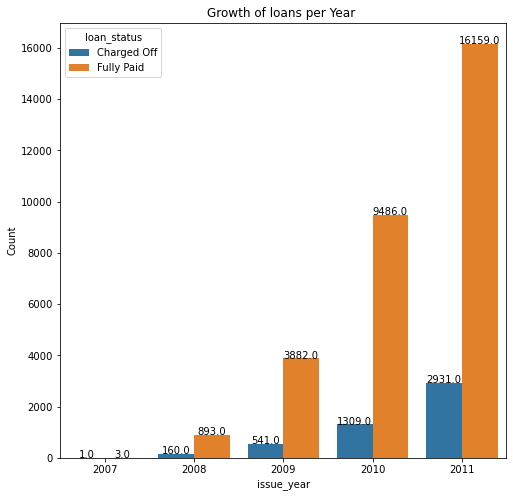

In [64]:
loan_analysis_df.issue_d = pd.to_datetime(loan_analysis_df.issue_d, format='%b-%y')
loan_analysis_df['issue_month'] = loan_analysis_df.issue_d.dt.month
loan_analysis_df['issue_year'] = loan_analysis_df.issue_d.dt.year

year_growth = loan_analysis_df.groupby(['issue_year','loan_status'])['loan_status'].agg(['count'])
year_growth = year_growth.reset_index()

fig, ax1 = plt.subplots(figsize=(8,8))
graph = sns.barplot(ax=ax1, data=year_growth, x="issue_year", y="count", hue='loan_status')
showbarlabel(graph)
plt.title("Growth of loans per Year ")
plt.ylabel("Count")
plt.show()

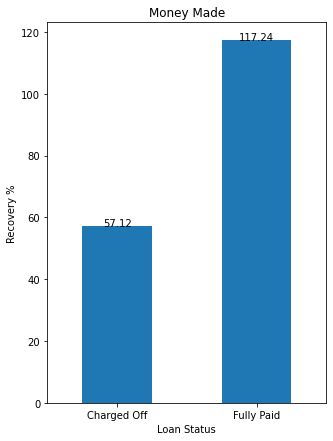

In [65]:
plt.figure(figsize=(5,7))
graph = round(loan_analysis_df.groupby('loan_status').total_pymnt.sum() * 100 / loan_analysis_df.groupby('loan_status').loan_amnt.sum(),2).plot.bar()
showbarlabel(graph)
plt.title("Money Made")
plt.ylabel("Recovery %")
plt.xlabel("Loan Status")
plt.show()

In [66]:
# slicing into two df fp = "Fully Paid" and cf = "Charged Off"
# To analyse if there is any pattern.
fp = loan_analysis_df[loan_analysis_df.loan_status =='Fully Paid']
cf = loan_analysis_df[loan_analysis_df.loan_status =='Charged Off']


In [67]:
print("Total Loss in charged off loan status is : {}%".format(round((cf.loan_amnt-cf.total_pymnt).sum()/cf.loan_amnt.sum()*100),2))
print("Total Charged off category loan is : {}% in dataset ".format(round(len(cf.index)/len(loan_analysis_df.index)*100),2))

Total Loss in charged off loan status is : 43%
Total Charged off category loan is : 14% in dataset 


Lending Club could only recover around 57% of the loan amount when loans are defaulted. Otherwise they end up making a profit of 17%. 

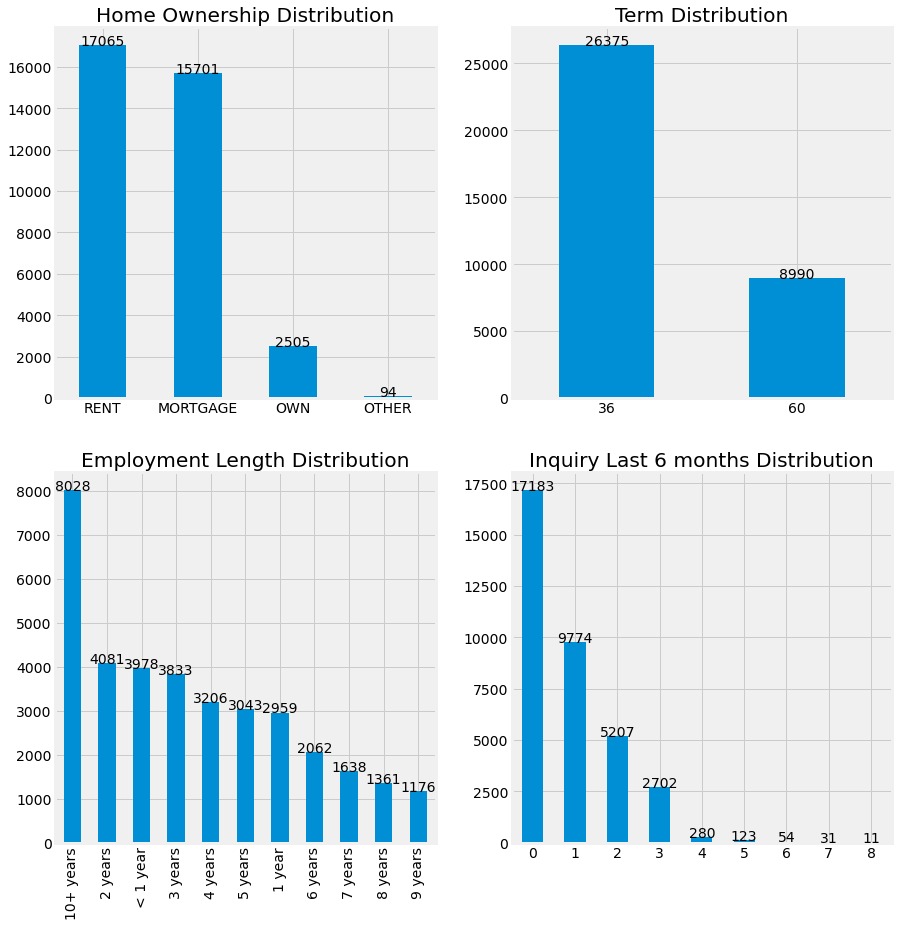

In [68]:
plt.figure(figsize=(15, 15))

plt.style.use('fivethirtyeight')

plt.subplot(2,2,1)
plt.title('Home Ownership Distribution')
plot_bar('home_ownership')
#graph = loan_analysis_df['loan_status'].value_counts().plot(kind='bar')
#showbarlabel(graph)

plt.subplot(2,2,2)
plt.title('Term Distribution')
plot_bar('term')
#graph = loan_analysis_df['term'].value_counts().plot(kind='bar')
#showbarlabel(graph)

plt.subplot(2,2,3)
plt.title('Employment Length Distribution')
plot_bar('emp_length',90)
#graph = loan_analysis_df['emp_length'].value_counts().plot(kind='bar')
#showbarlabel(graph,90)

plt.subplot(2,2,4)
plt.title('Inquiry Last 6 months Distribution')
plot_bar('inq_last_6mths')
#graph = loan_analysis_df['inq_last_6mths'].value_counts().plot(kind='bar')
#showbarlabel(graph)

plt.show()


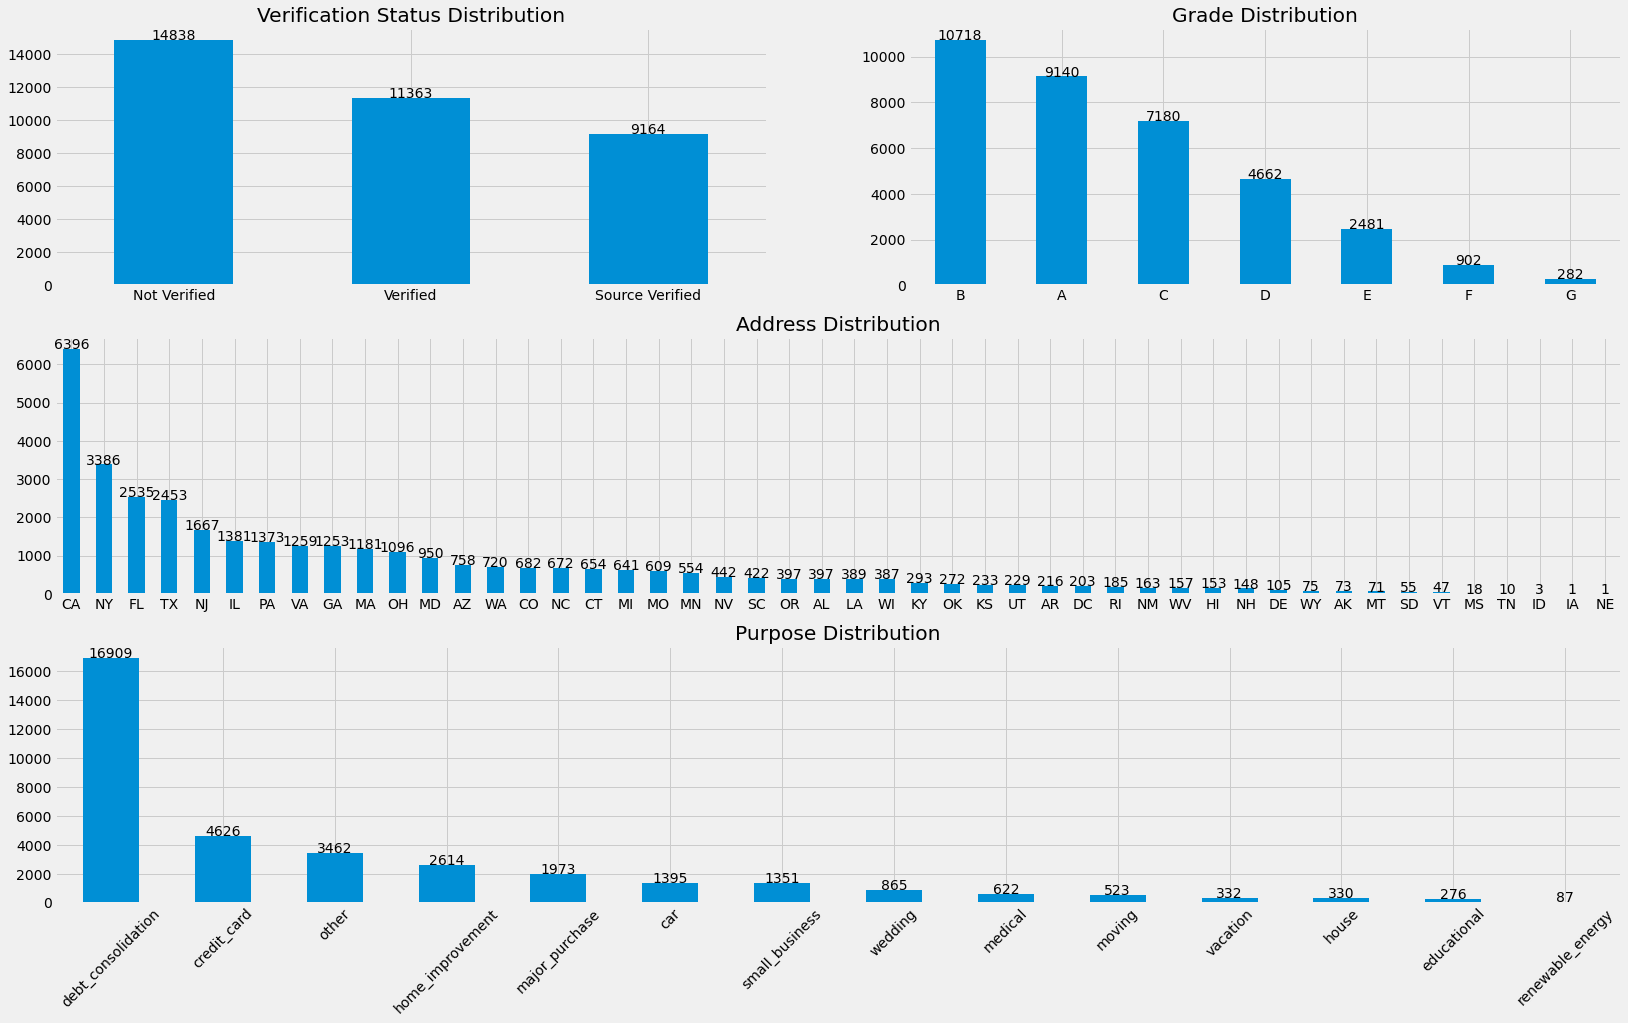

In [69]:
plt.figure(figsize=(25, 15))

plt.style.use('fivethirtyeight')

plt.subplot(3,2,1)
plt.title('Verification Status Distribution')
plot_bar('verification_status')
#graph = loan_analysis_df['verification_status'].value_counts().plot(kind='bar')
#showbarlabel(graph)

plt.subplot(3,2,2)
plt.title('Grade Distribution')
plot_bar('grade')

plt.subplot(3,2,(3,4))
plt.title('Address Distribution')
plot_bar('addr_state')
#graph = loan_analysis_df['addr_state'].value_counts().plot(kind='bar')
#showbarlabel(graph)

plt.subplot(3,2,(5,6))
plt.title('Purpose Distribution')
plot_bar('purpose', 45)
#graph = loan_analysis_df['purpose'].value_counts().plot(kind='bar')
#showbarlabel(graph, 45)

plt.show()


**Inferences**
   - Most of the Loans originate from CA
   - Debt Consolidation is the most sought after loan reason
   - Most of the Loans are given to Renters/Mortgage users
   - Most of the Loans are Not Verified by LC
   - Most Loans are given to Employees whoose Average Employment Length is greater than 10 years

This gives us a good idea to start Univariate and Multivariate Analysis on the variables

**Prelimnary Analysis to see if there is any correlation between the continuous variables**

Lets draw a heatmap of all the variables as well and see if there are any prelimnary insights

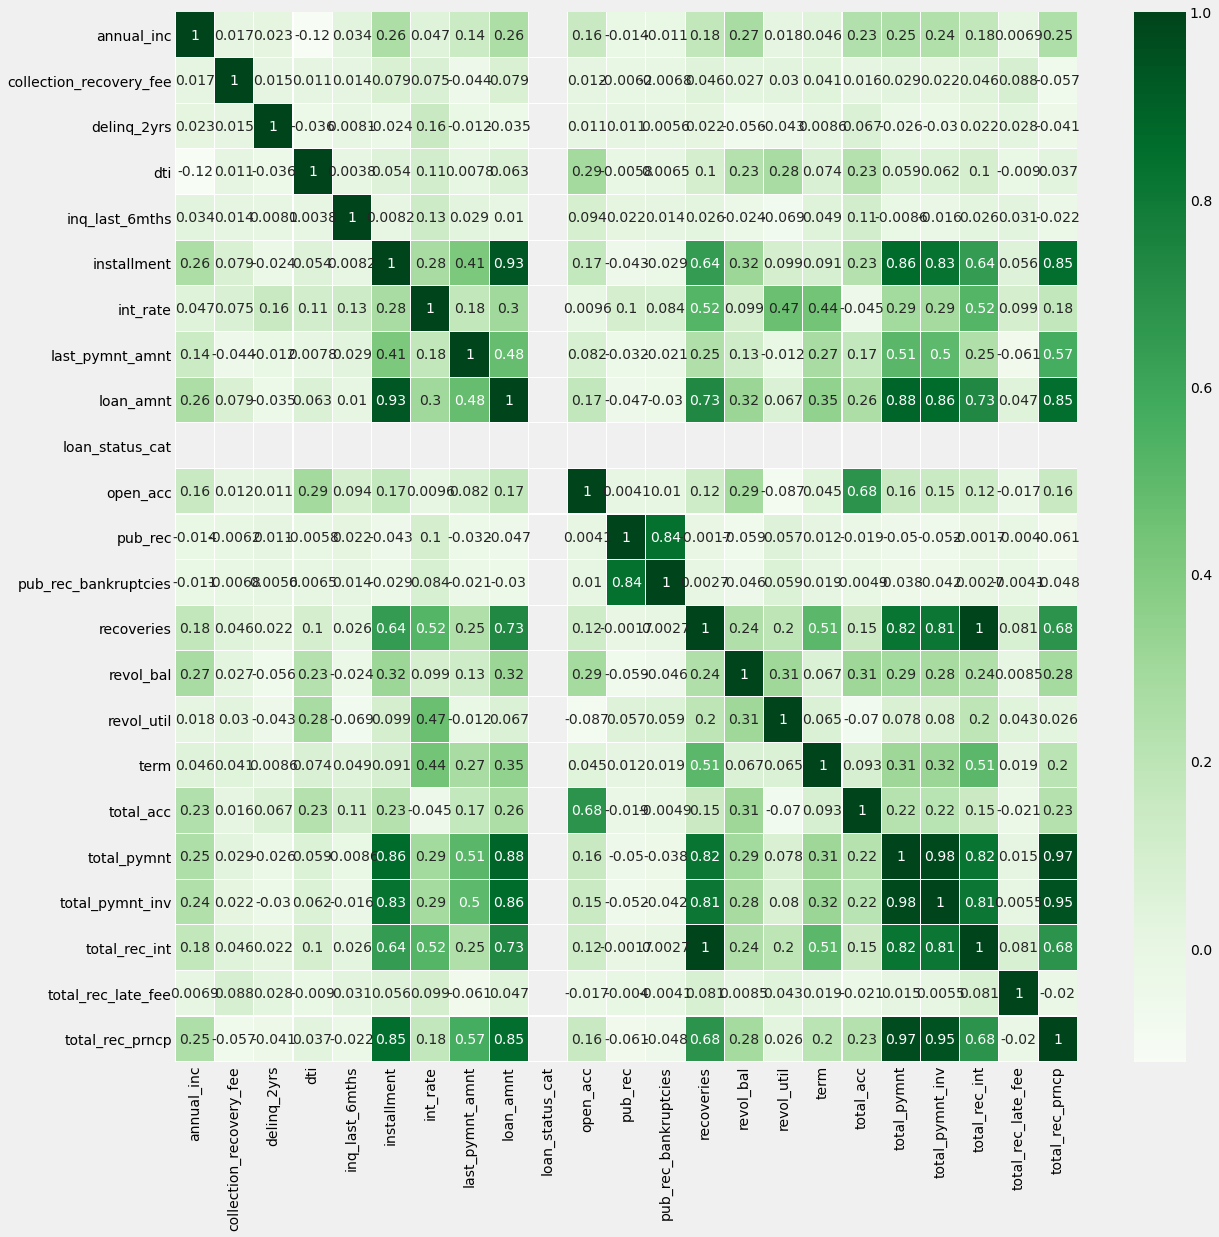

In [70]:
li=loan_analysis_df[quant_variables]
plt.style.use('fivethirtyeight')
corr=li.corr()
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(corr, cmap="Greens",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,linewidths=.1)
plt.show()

Inferences : 

  - **total_payment** and **total_payment_inv** and **loan_amt** are highly correlated
 
  - **pub_rec_bankruptcy** and **pub_rec** show 100% correlation.
  
  - **dti** has a mild correlation to **charged off loans** which we can explore further
    

### 4.1 Univariate Analysis ###

Based on the Data Analysis we have a few variables which we will be using Univariate Analysis on a few chosen variables

Variable : **int_rate**

Does the interest rate impact the ability of the borrower to repay the loan?

In [71]:
loan_analysis_df.int_rate.describe()

count    35365.000000
mean        11.983494
std          3.702615
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [72]:
#we need to round off the rates and bin thm
loan_analysis_df['int_rate_binned'] = round(loan_analysis_df['int_rate'],0)
loan_analysis_df['int_rate_binned'].describe()

count    35365.000000
mean        11.974523
std          3.694420
min          5.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: int_rate_binned, dtype: float64

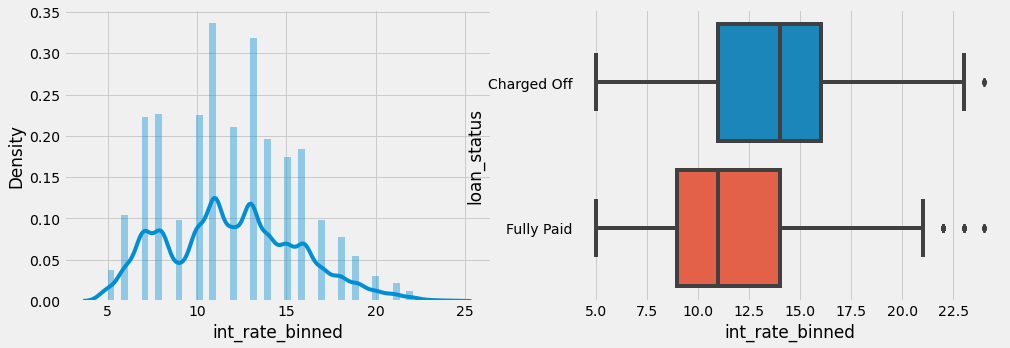

In [73]:
plotDistribution_against_Category(loan_analysis_df, 'int_rate_binned')

In [74]:
loan_analysis_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.0,13.930376,3.647785,5.42,11.49,13.79,16.45,24.40
Fully Paid,30423.0,11.667236,3.613794,5.42,8.59,11.49,14.09,24.11


**Inference**

Charged off loans are 2% points higher than Fully paid loans. 
Looks like LC is assessing risk correctly and charging riskier loans higher

Variable : **pub_rec_bankruptcies** 


Does previous public record of bankruptcies of an individual impact the ability to close a loan?

In [75]:
loan_analysis_df.loc[:,["pub_rec","pub_rec_bankruptcies"]].value_counts()

pub_rec  pub_rec_bankruptcies
0        0.0                     33516
1        1.0                      1462
         0.0                       334
2        0.0                        39
3        0.0                         7
2        2.0                         5
4        0.0                         2
dtype: int64

**Finding**
- Outstanding Bankruptcies could possibly impact. Lets analyse this further

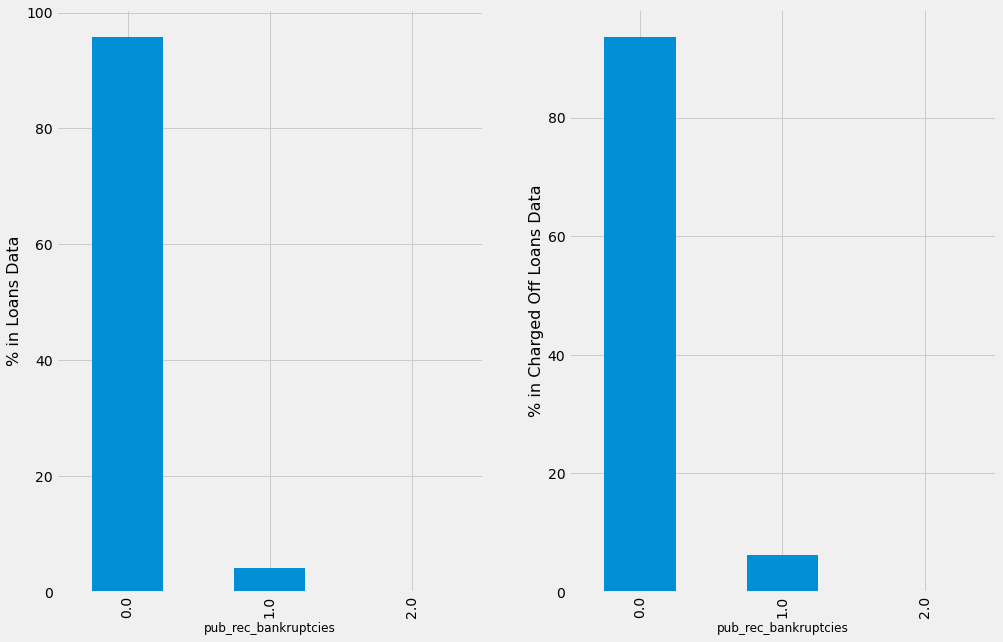

In [76]:
plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'pub_rec_bankruptcies')


**INFERENCE**: NO Significant Correlation can be derived on previous bankruptcies

Variable : **inq_last_6mths**

Does repeat enquiry impact the ability to close a loan?

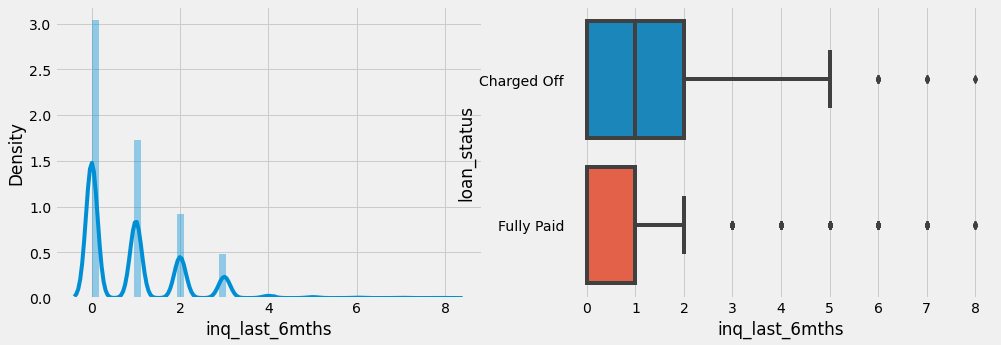

In [77]:
plotDistribution_against_Category(loan_analysis_df, 'inq_last_6mths')

**Observation** We see the median is higher in Charged Off loans and hence it looks like repeat enquiry leads to higher chances of Charged off loans.

Variable : **Purpose**


Does the Purpose of the loan impact the ability to close a loan?


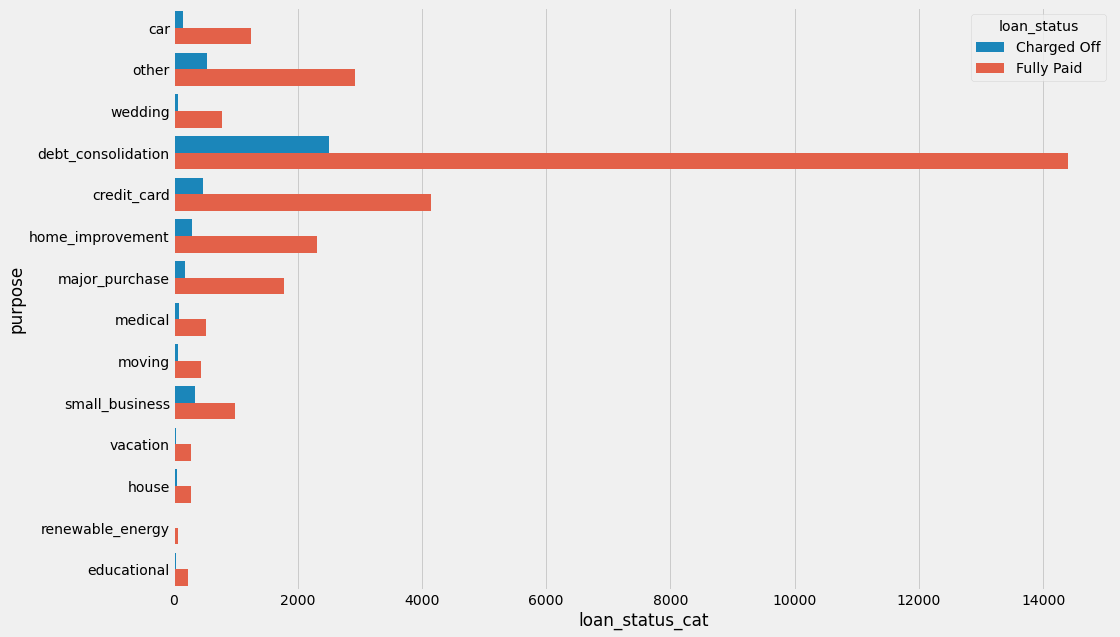

In [78]:
    plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'purpose', hue = 'loan_status')

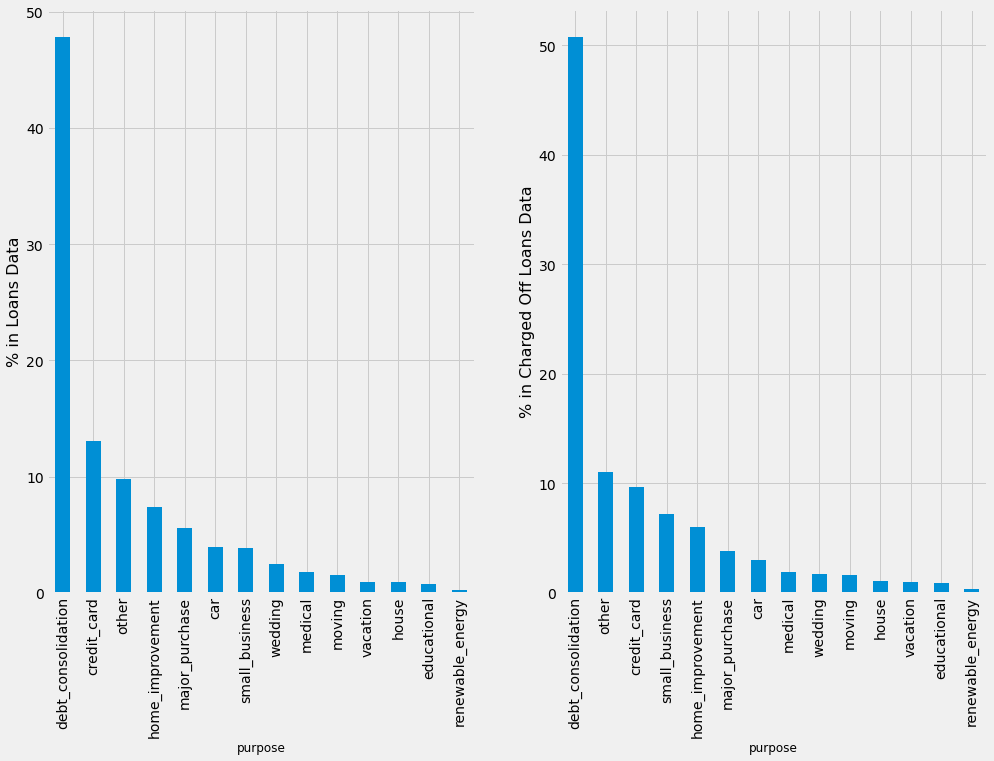

In [79]:
plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'purpose')

**Observation** It looks like Debt Consolidation has the maximum number of defaulters, but numbers can be misleading. Lets look at this a relative of the total loans, and see if there is a significant variance in the numbers 

In [80]:
total_per_loan_status = loan_analysis_df.groupby(['loan_status','purpose'])['purpose'].count()
total =loan_analysis_df.groupby('purpose')['purpose'].count()
percentage_category_df = round(total_per_loan_status.unstack()* 100/total.T, 2)
percentage_category_df

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,10.68,10.35,14.83,16.3,11.32,15.76,9.63,15.27,15.11,15.77,17.24,26.35,14.76,9.6
Fully Paid,89.32,89.65,85.17,83.7,88.68,84.24,90.37,84.73,84.89,84.23,82.76,73.65,85.24,90.4


**Inference** 

As can be seen above, the relative percentages of Purpose as a percentage of Total Loans is well within the range of all loans. So this can be safely ignored

Variable : **Term** 

Does Term Impact the ability to pay off a loan? 

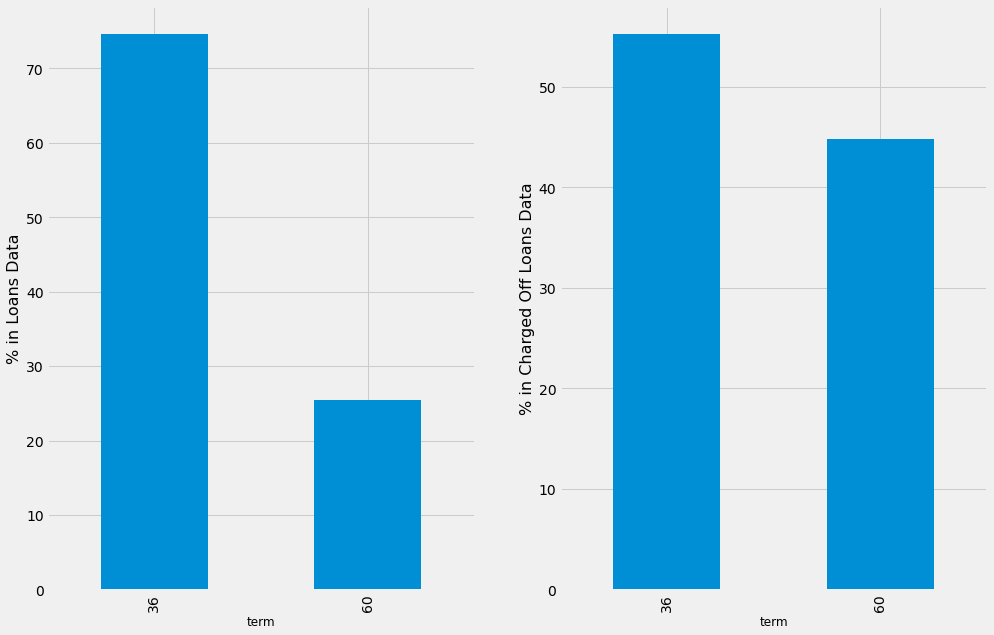

In [81]:
plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'term', title="Segmented Univariate Analysis on Term")

**Inference** 

There is a definite correlation betwen higher term and charged off loans. Almost 40% of all charged off Loans have duration of 60 months. 

**Variable**  - Recoveries

Is Loan Club able to Recover Losses after it has been "Charged Off"?



In [82]:
loan_analysis_df.recoveries.value_counts(normalize=True).head(10)

1196.57    0.000735
1784.23    0.000481
1148.14    0.000481
717.95     0.000481
514.52     0.000424
956.78     0.000396
478.39     0.000396
1907.35    0.000368
1500.79    0.000339
1435.90    0.000339
Name: recoveries, dtype: float64

Text(0.5, 0, 'Percentage of Recovered LoanAmt on Charged Off Loans (%)')

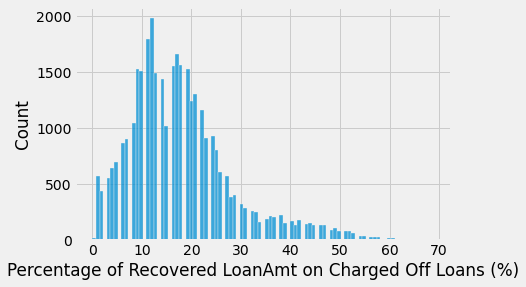

In [83]:
loan_analysis_df[loan_analysis_df.loan_status=="Charged Off"]
recovery_ratio  = round(loan_analysis_df.recoveries/loan_analysis_df.loan_amnt,2)*100

ax = sns.histplot(recovery_ratio)
ax.set_xlabel('Percentage of Recovered LoanAmt on Charged Off Loans (%)')

**Inference**


The Recovery Rate is below 30% for close to 100% of the Charged of Loans. 
This makes it very important for Lending club to ensure that there are minimum defaults

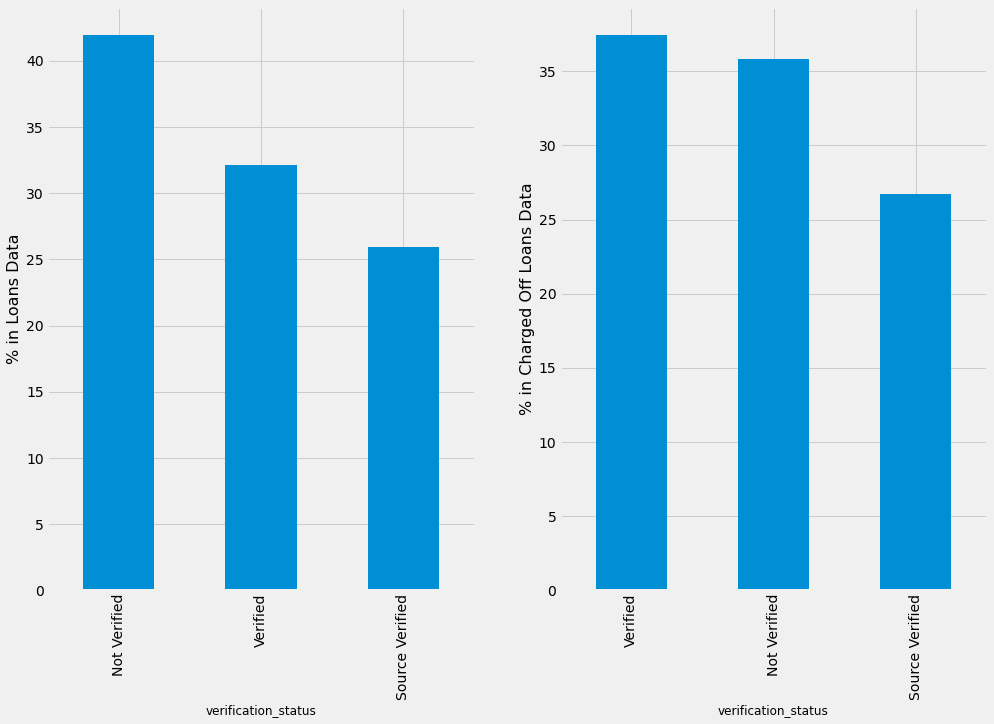

In [84]:
plot_dualbar_or_huebar(loan_analysis_df, categorize_by = 'verification_status')

**Inference** 

It looks like around 45% of the loans are not verified by LC, and 35% of the Loans are charged off.  Surprisingly for Verified Loans the Charge Off Percentage is increasing
Verification Process needs to be strengthened
This looks bit counter intuitive. We will explore this further in Bi Variate Analysis.

**Variable** - **dti**

Does the debt to income ratio, have any corelation to the Charged off Loans?

In [85]:
loan_analysis_df.dti.describe()

count    35365.000000
mean        13.404126
std          6.636652
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

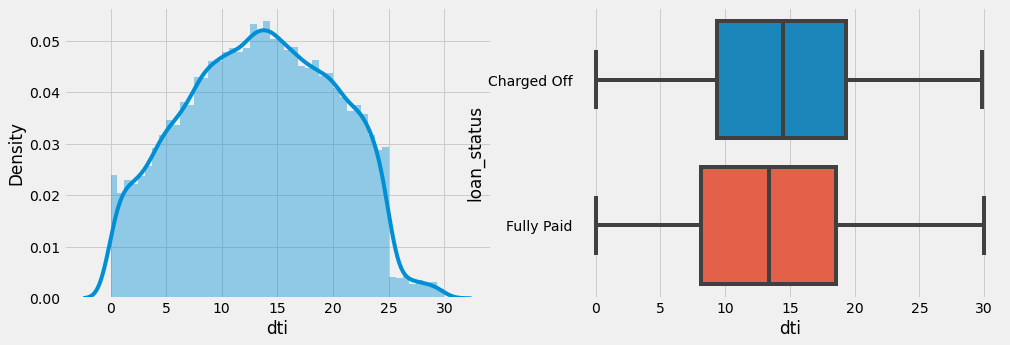

In [86]:
plotDistribution_against_Category(loan_analysis_df, "dti")

**Inference**

  - As can be seen the 75% of all Fully Paid Loans is around 17, which is less than that of Charged of Loans. 
  - We can infer that the DTI above 18 is at higher risk of being "Charged Off" State

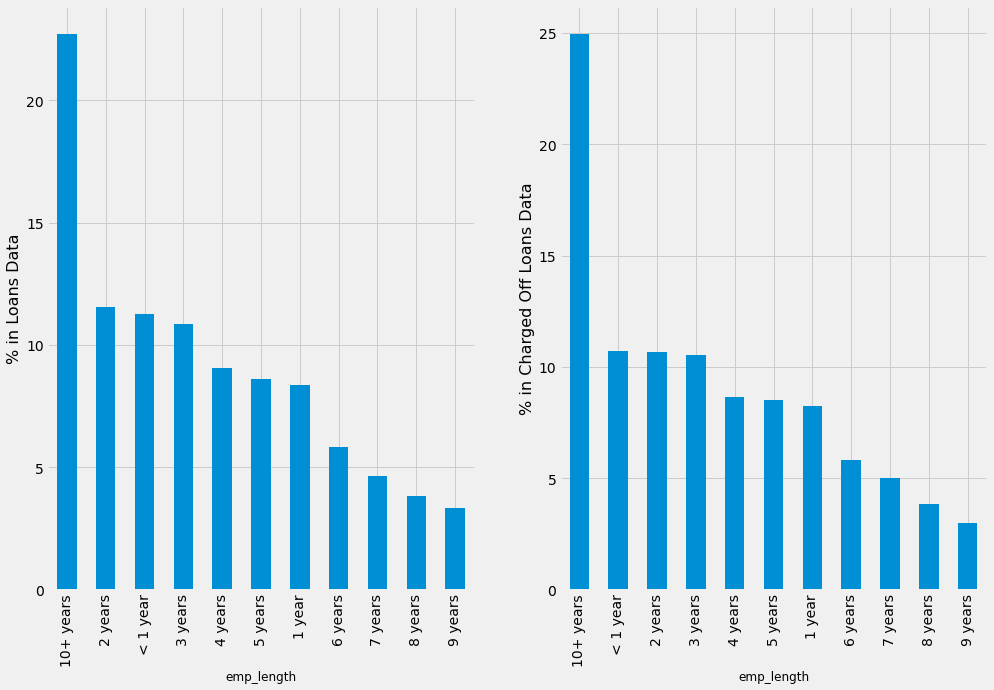

In [87]:
plot_dualbar_or_huebar(loan_analysis_df, 'emp_length')

**Inference**
   - Both the distributions are similar, which means that the strategy is working weel
   - Max Loans are given to tenured employees, which is working well. 
   - LC should continue doing the same

**Variable** - **Home Ownership**

Does Homeownership impact the probability of repaying the loan?

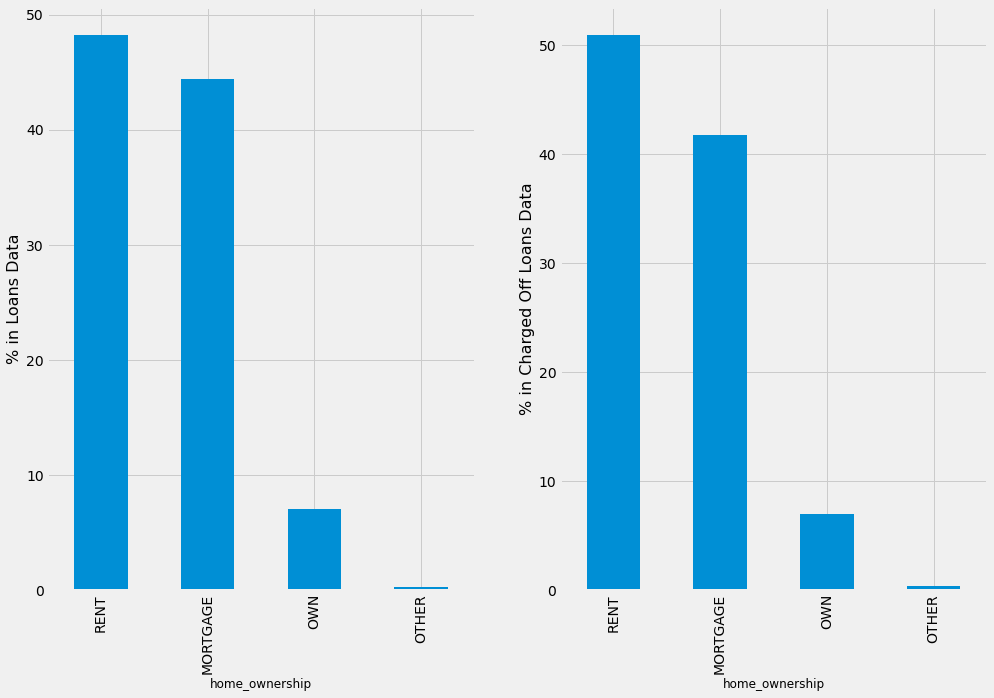

In [88]:
plot_dualbar_or_huebar(loan_analysis_df, 'home_ownership')

**Observation**: 
    - No Significant Inferences can be drawn wrt to Charged off Loans
    - We need to do probabiliy analysis to see if we are missing something

**Variable** - issue_d

Does the issue date impact the ability to repay loans?

In [89]:
loan_analysis_df.columns

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'loan_status_cat', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'recoveries', 'revol_bal',
       'revol_util', 'sub_grade', 'term', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'verification_status', 'issue_month', 'issue_year',
       'int_rate_binned'],
      dtype='object')

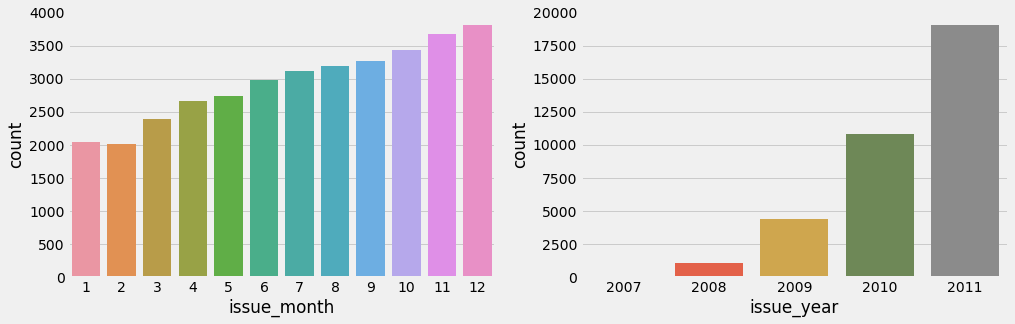

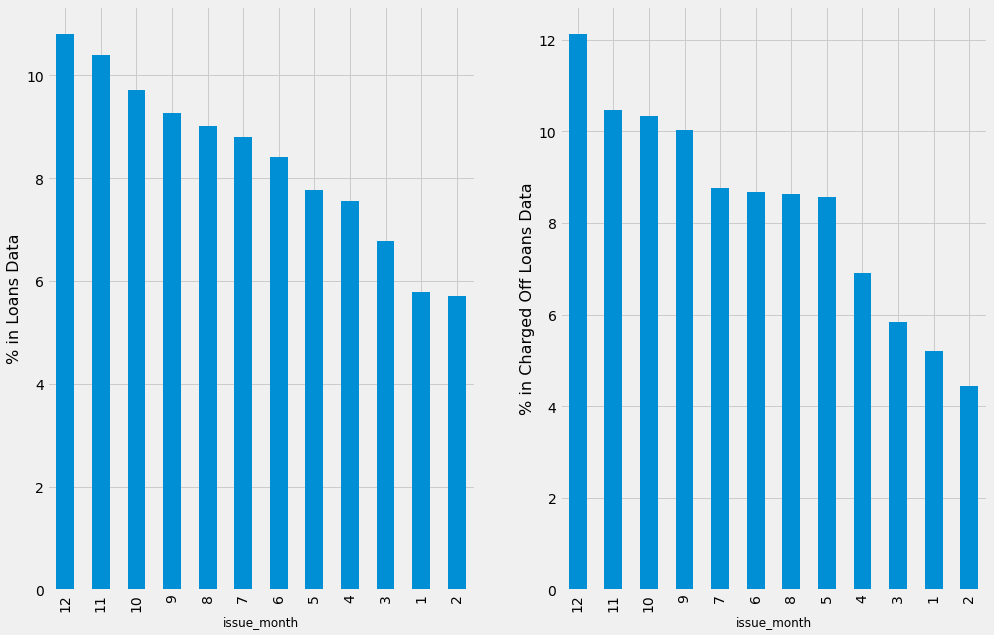

In [90]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data=loan_analysis_df, x='issue_month', )

plt.subplot(2,2,2)
sns.countplot(data=loan_analysis_df, x='issue_year', )

plot_dualbar_or_huebar(loan_analysis_df, 'issue_month')



**Inference**

- LC has been giving out maximum loans in December
- LC is having more than 100% increase on year on year increase in the Loans issues. 
- There is a high distribution of Loans in December and every year, but there is no break in the process, it seems the process is working well

**Variable** - **open_acc**

Does the borrower having more Credit Lines impact the ability to repay the loan?

In [91]:
loan_analysis_df.open_acc.describe()

count    35365.000000
mean         9.332080
std          4.374926
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

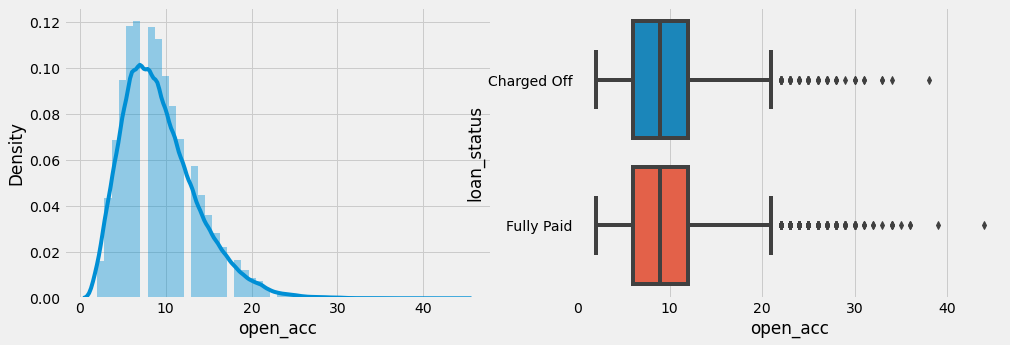

In [92]:
plotDistribution_against_Category(loan_analysis_df, "open_acc")

**Inference**

- LC Customers seem to have more credit lines- around 9
- Having more credit lines does not impact the ability of the borrower to repay

### 4.2 Bivariate Analysis ###

Variable **Grade** + **SubGrade** with **Probability of Loan being Charged Off**

Does the **Grade** or **SubGrade** of the loan impact the ability to Close the Loan. 


TypeError: 'NoneType' object is not callable

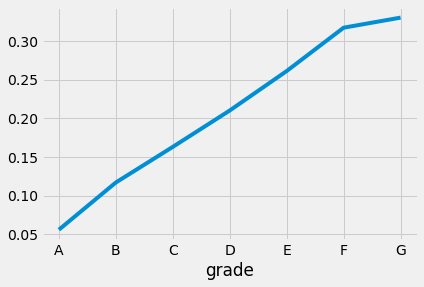

In [93]:
ct = pd.crosstab(loan_analysis_df['grade'], loan_analysis_df['loan_status'],margins=True)
ct['prob_by_grad'] = round(ct['Charged Off']/ct['All'],3)
## Remove All 
ct = ct[0:-1]
#plt.figure(figsize=[8,6])
        
plt.style.use('fivethirtyeight')
#plt.subplot(1, 2, 1)
line_plot = ct['prob_by_grad'].plot()
ax = line_plot.plot( marker='o',color = 'b')
plt.title(" Grade and its probability of being Charged Off")
plt.show()

#plt.subplot(1, 2, 2)
plt.figure(figsize=[10,8])
ax1= agg_grade_loans = loan_analysis_df.groupby(['loan_status','grade'])['grade'].agg(['count']).rename(columns={'count':'Frequency'})
agg_grade_loans.Frequency.unstack().T.plot.bar(stacked=True)
plt.title("Actual Loans per Grade ")
plt.show()


In [ ]:
ct = pd.crosstab(loan_analysis_df['sub_grade'], loan_analysis_df['loan_status'],margins=True)
ct['prob_by_sub_grad'] = round(ct['Charged Off']/ct['All'],3)
plt.style.use('fivethirtyeight')
ct = ct[0:-1]

line_plot = ct['prob_by_sub_grad'].plot()
ax1 = line_plot.plot(figsize=(20,10), marker='o',color = 'b')
plt.title(" Sub Grade and its probability of being Charged Off")

agg_grade_loans1 = loan_analysis_df.groupby(['loan_status','sub_grade'])['sub_grade'].agg(['count']).rename(columns={'count':'Frequency'})
agg_grade_loans1.Frequency.unstack().T.plot.bar(stacked=True)
plt.title("Actual Loans per Sub Grade")


**Inference** 
LC should continue with its Grading System, it is working well
As the Grade increases, the probability of charge off is also increased.

Variable : **Verification Status** and **Loan Amount** with **Loan Status**

Does the Loan Amount,Verification Status impact the Loan Status

In [ ]:
#First let us validate the distribution
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loan_analysis_df.loan_amnt)
plt.subplot(1,2,2)
sns.boxplot(loan_analysis_df.loan_amnt)
plt.show()

In [ ]:
#Distribution is bit skewed towards the right. But we will look at the median 

sns.barplot(data=loan_analysis_df, x='verification_status', hue='loan_status', y='loan_amnt', estimator = np.median)


**Inference** 
- The Verification System seems to be OK. The rationale is right
- Source Verifiction needs to be tightened
- Verification happens for higher Value Amounts. Lower Amounts are not verified. 

Variable **home_ownership** with **Probability of Loan being Charged Off**

 - We did univariate analysis of home ownership and figured out not significant difference in the distribution of Charged off and Fully paid Customers
 - We will now compare this with the probability of Default (Total Favourable Occurences/Total No of Occurences) and see absolute value
 
 

In [ ]:
ct3 = pd.crosstab(loan_analysis_df['home_ownership'], loan_analysis_df['loan_status'],margins=True)
ct3['prob_by_home_ownership'] = round(ct3['Charged Off']/ct3['All'],3)

plt.figure (figsize=[15,5])
#plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
line_plot = ct3['prob_by_home_ownership'].plot()
ax = line_plot.plot( marker='o',color = 'b')
plt.title(" House Ownership and its probability of being Charged Off")

#plt.subplot(1, 2, 2)
plt.figure (figsize=[15,5])
agg_house_own_loans = loan_analysis_df.groupby(['loan_status','home_ownership'])['home_ownership'].agg(['count']).rename(columns={'count':'Frequency'})
agg_house_own_loans.Frequency.unstack().T.plot.bar(stacked=True)
plt.title("Actual Loans per House Ownership")
plt.show()

**Inference**

- The probability of default for those who have a mortgage is the lease at 12%
- The probability of default of those who dont own a house is the max at 18%
- LC is doing the right thing by prioritizing users who have a mortgage or own a house
- LC should probably increase the number of loans to those who own a mortgage, which is marginally lower than Own Houses


## 5. Summary Recommendation ##

We went over the Data Set and analysed the various fields using the Data Dictionary, and combination of Visual Analysis, Univariate and Bivariate Analysis

Prelimnary Findings are in the **Inference** Section of the Document. For Detailed Analysis, Pls look at the accompanying deck